<a href="https://colab.research.google.com/github/ajay8466/OIBSIP/blob/main/Autocomplete_and_Autocorrect_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/creditcard[1].csv')
df.shape

(15936, 31)

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,...,15936.000000,15936.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000
mean,12121.217871,-0.254293,0.277171,0.803852,0.301343,-0.130469,0.112551,-0.150434,0.000687,0.860838,...,-0.061754,-0.162257,-0.036524,0.011509,0.117477,0.037900,0.015402,0.006161,66.390222,0.004581
std,8982.283843,1.843083,1.491497,1.704252,1.491713,1.382485,1.329406,1.321898,1.303509,1.253988,...,0.855525,0.624614,0.543296,0.587200,0.436867,0.546881,0.401168,0.253739,189.355098,0.067531
min,0.000000,-28.344757,-40.978852,-27.368650,-5.172595,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.593642,-26.751119,-2.512377,-7.495741,-1.338556,-8.567638,-3.575312,0.000000,0.000000
25%,3633.500000,-0.970824,-0.286548,0.371671,-0.621215,-0.712525,-0.639011,-0.600811,-0.179179,0.067089,...,-0.268829,-0.559341,-0.173003,-0.336475,-0.140144,-0.355523,-0.073563,-0.013205,5.490000,0.000000
50%,10980.000000,-0.318478,0.247437,0.941822,0.231366,-0.186241,-0.160812,-0.084696,0.017471,0.851878,...,-0.127164,-0.126343,-0.044512,0.060331,0.155636,-0.027574,0.001209,0.017630,15.950000,0.000000
75%,20621.500000,1.161949,0.884689,1.575960,1.180124,0.352221,0.501828,0.440006,0.266216,1.567643,...,0.027233,0.229727,0.072765,0.393416,0.393032,0.359173,0.100782,0.076575,53.890000,0.000000
max,27371.000000,1.960497,14.601998,4.101716,11.927512,34.099309,21.393069,34.303177,17.052566,10.392889,...,22.614889,4.534454,13.876221,3.695503,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [ ]:
df.isnull().values.any()

True

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15936 entries, 0 to 15935
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    15936 non-null  int64  
 1   V1      15936 non-null  float64
 2   V2      15936 non-null  float64
 3   V3      15936 non-null  float64
 4   V4      15936 non-null  float64
 5   V5      15936 non-null  float64
 6   V6      15936 non-null  float64
 7   V7      15936 non-null  float64
 8   V8      15936 non-null  float64
 9   V9      15936 non-null  float64
 10  V10     15936 non-null  float64
 11  V11     15936 non-null  float64
 12  V12     15936 non-null  float64
 13  V13     15936 non-null  float64
 14  V14     15936 non-null  float64
 15  V15     15936 non-null  float64
 16  V16     15936 non-null  float64
 17  V17     15936 non-null  float64
 18  V18     15936 non-null  float64
 19  V19     15936 non-null  float64
 20  V20     15936 non-null  float64
 21  V21     15936 non-null  float64
 22

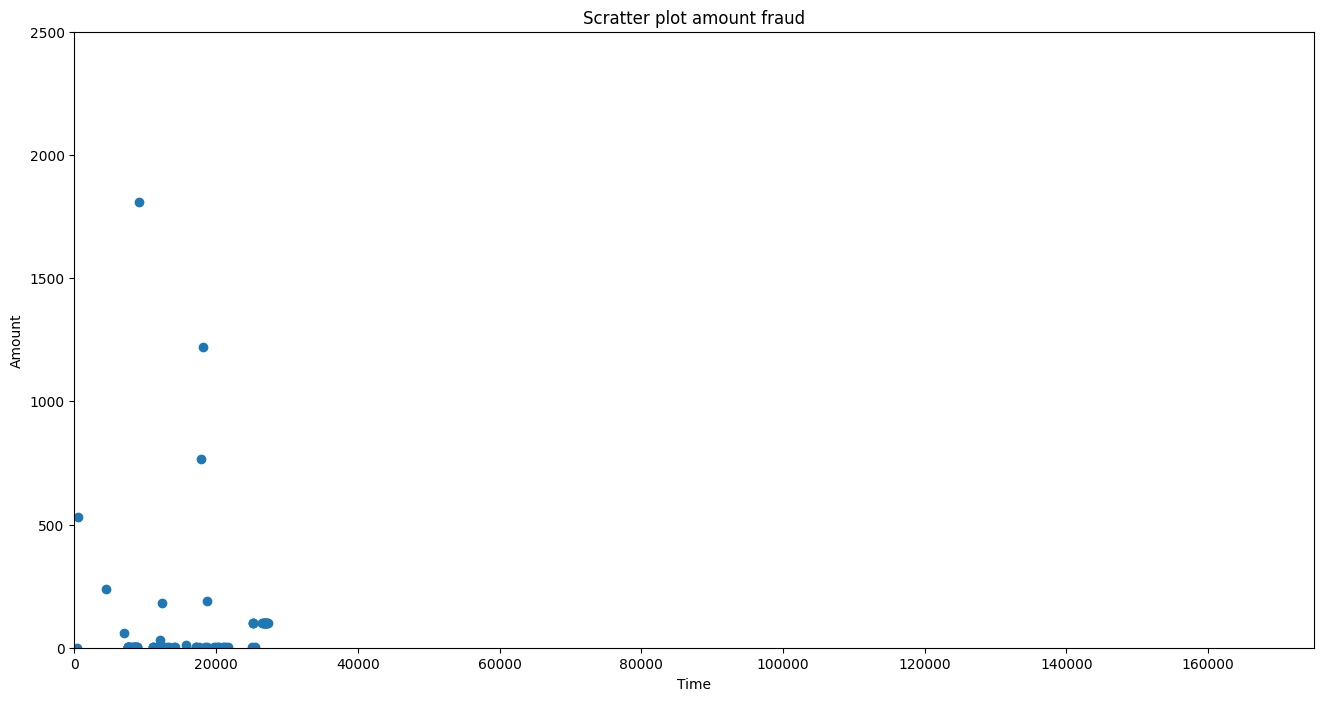

In [ ]:
df_fraud = df[df['Class'] == 1] # Recovery of fraud data
plt.figure(figsize=(16,8))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

In [ ]:
number_fraud = len(df[df.Class == 1])
number_no_fraud = len(df[df.Class == 0])
print('There are only '+ str(number_fraud) + ' frauds in the original dataset, even though there are ' + str(number_no_fraud) +' no frauds in the dataset.')

There are only 73 frauds in the original dataset, even though there are 15862 no frauds in the dataset.


In [ ]:
df_corr = df.corr()

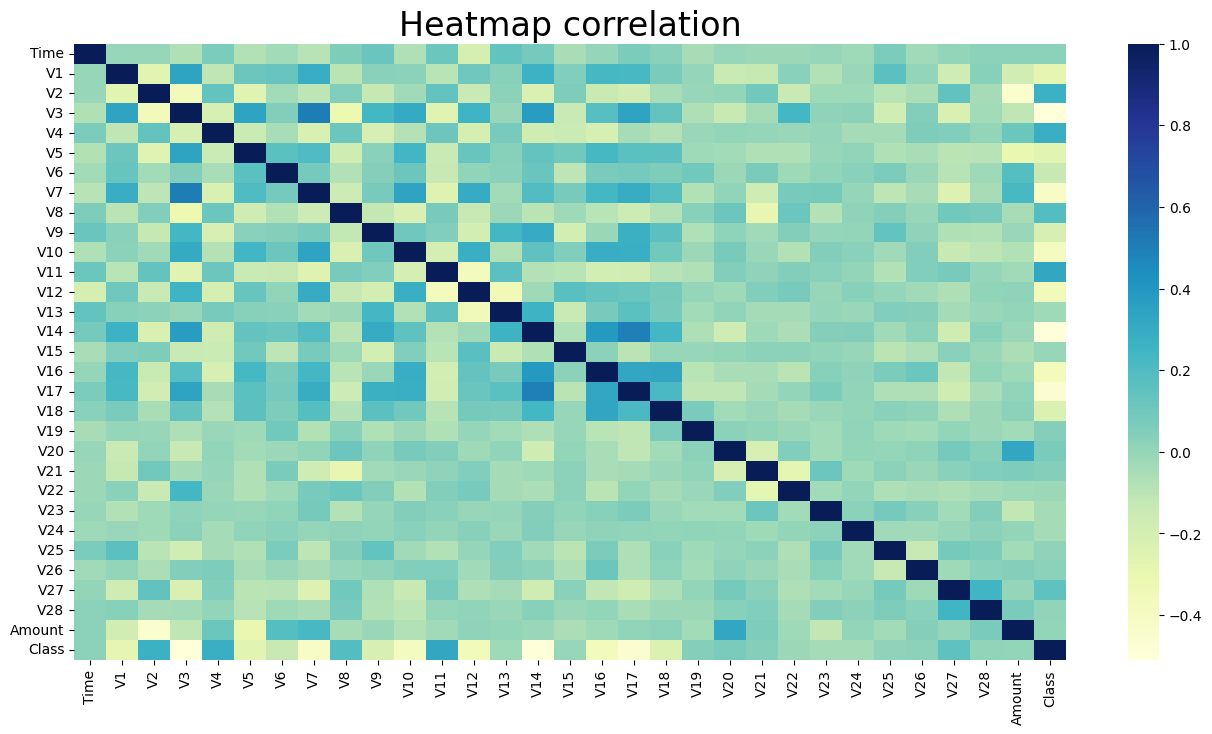

In [ ]:
import seaborn
plt.figure(figsize=(16,8))
seaborn.heatmap(df_corr, cmap="YlGnBu") # Displaying the Heatmap
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

In [ ]:
Fraud = df[df['Class']==1]
Normal = df[df['Class']==0]

In [ ]:
pd.concat([Normal.Amount.describe(), Normal.Time.describe()],  axis=1)

,Amount,Time
count,15862.000000,15862.000000
mean,66.280151,12104.432165
std,188.898885,8984.508696
min,0.000000,0.000000
25%,5.522500,3611.750000
50%,15.950000,10977.000000
75%,53.890000,20601.500000
max,7712.430000,27370.000000


In [ ]:
pd.concat([Fraud.Amount.describe(), Fraud.Time.describe()],  axis=1)

,Amount,Time
count,73.000000,73.000000
mean,90.307123,15559.643836
std,271.634360,7670.577525
min,0.000000,406.000000
25%,1.000000,8528.000000
50%,1.000000,14073.000000
75%,99.990000,21419.000000
max,1809.680000,27252.000000


In [ ]:
print('Fraud Shape:\t', Fraud.shape)
print('Normal Shape:\t', Normal.shape)

Fraud Shape:	 (73, 31)
Normal Shape:	 (15862, 31)


In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['amount_scale'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['time_scale'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [ ]:
amount_scale = df['amount_scale']
time_scale = df['time_scale']

df.drop(['amount_scale', 'time_scale'], axis=1, inplace=True)
df.insert(0, 'amount_scale', amount_scale)
df.insert(1, 'time_scale', time_scale)

df.head()

,amount_scale,time_scale,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,2.761777,-0.646339,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0
1,-0.273967,-0.646339,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0
2,7.494008,-0.646280,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0
3,2.222107,-0.646280,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0
4,1.116529,-0.646221,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0


In [ ]:
df = df.sample(frac=1)

fraud = df.loc[df['Class'] == 1]
normal = df.loc[df['Class'] == 0][:492]

normal_distributed_data = pd.concat([fraud, normal])

sample_data = normal_distributed_data.sample(frac=1, random_state=42)
sample_data.head(2)

,amount_scale,time_scale,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
1773,-0.197314,-0.565576,-0.961747,1.074033,1.465953,1.114826,-0.001262,0.375770,0.382776,0.314897,...,-0.000988,-0.066559,0.137918,-0.256308,-0.020898,0.017082,-0.263690,-0.345546,-0.358688,0.0
15134,-0.288636,0.912468,1.222138,0.238514,0.728859,0.749802,-0.771889,-1.306355,0.049734,-0.219850,...,-0.132669,-0.226333,-0.675163,0.206400,0.903041,0.134383,0.062713,-0.030691,0.023701,0.0


In [ ]:
sample_data.shape

(565, 31)

In [ ]:
X = sample_data.drop('Class', axis=1)
y = sample_data['Class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.svm import SVC
svm_model = SVC()

In [ ]:
svm_params = {"C": np.arange(1,10), "kernel":["linear", "rbf"]}

In [ ]:
from sklearn.model_selection import GridSearchCV
svm_cv_model = GridSearchCV(svm_model, svm_params, cv=7, n_jobs=-1, verbose=7).fit(X_train, y_train)

Fitting 7 folds for each of 18 candidates, totalling 126 fits


In [ ]:
svm_cv_model.best_score_

0.9846938775510203

In [ ]:
best_params = svm_cv_model.best_params_
print(best_params)

{'C': 6, 'kernel': 'rbf'}


In [ ]:
svm = SVC(C = best_params['C'], kernel=best_params['kernel'], probability=True).fit(X_train, y_train)

In [ ]:
y_pred_svm = svm.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_svm)

0.9882352941176471

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(svm, X_train, y_train, cv=21).mean()

0.9848231690336953

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       154
         1.0       0.94      0.94      0.94        16

    accuracy                           0.99       170
   macro avg       0.97      0.97      0.97       170
weighted avg       0.99      0.99      0.99       170



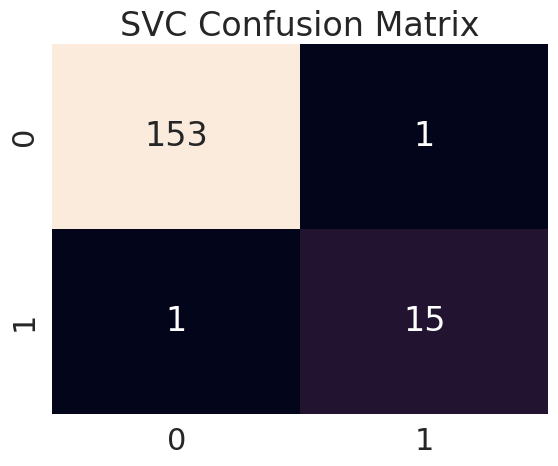

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title('SVC Confusion Matrix')
plt.savefig('svc_con_mat')
plt.show()
